In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import DBSCAN

In [16]:
df = pd.read_csv("cleaned_f1_data_New.csv")

Numerical Attributes (we perform Clustering only on Numerical data)

In [17]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['Season', 'Round', 'Latitude', 'Longitude', 'Driver Age',
       'Driver Experience (Years)', 'Driver Championship Points',
       'Driver Fastest Lap Time', 'Driver Fastest Lap Rank', 'Grid Position',
       'Race Position', 'Points Earned', 'Fastest Lap (s)', 'Fastest Lap Rank',
       'Total Pit Stops', 'Race Laps Completed'],
      dtype='object')


In [18]:
to_drop = ['Driver Championship Points','Latitude', 'Longitude','Driver Experience (Years)', 'Driver Fastest Lap Time', 'Driver Fastest Lap Rank', 'Points Earned', 'Fastest Lap (s)', 'Fastest Lap Rank', 'Total Pit Stops']
df = df.drop(columns=to_drop, errors='ignore')
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['Season', 'Round', 'Driver Age', 'Grid Position', 'Race Position',
       'Race Laps Completed'],
      dtype='object')


In [19]:
df.head()

,Season,Round,Race Name,Date,Circuit,Country,Driver,Driver Nationality,Driver Age,Constructor,Constructor Nationality,Grid Position,Race Position,Race Laps Completed,Retirement Status
0,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Bob Gerard,British,36,ERA,British,13,6,67,Finished
1,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Cuth Harrison,British,44,ERA,British,15,7,67,Finished
2,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,David Hampshire,British,33,Maserati,Italian,16,9,64,Finished
3,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Brian Shawe Taylor,British,35,Maserati,Italian,20,10,64,Finished
4,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,Joe Fry,British,35,Maserati,Italian,20,10,64,Finished


In [20]:
pca_data = df[numeric_columns].drop(columns=['Race Position']).copy()
target_data = df['Race Position'].copy()
pca_data.head()
pca_data.to_csv('cleaned_f1_data_for_pca.csv', index=False)

Normalize the data using StandardScaler

In [21]:
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

In [22]:
pca_data_scaled_df = pd.DataFrame(pca_data_scaled, columns=pca_data.columns) # Convert the scaled data back to a DataFrame
pca_data_scaled_df.head()

,Season,Round,Driver Age,Grid Position,Race Laps Completed
0,-1.821821,-1.316851,1.095182,0.091218,0.997186
1,-1.821821,-1.316851,2.753721,0.355836,0.997186
2,-1.821821,-1.316851,0.473230,0.488145,0.896235
3,-1.821821,-1.316851,0.887864,1.017380,0.896235
4,-1.821821,-1.316851,0.887864,1.017380,0.896235


Applying PCA

In [23]:
# Apply PCA (3 components)
pca = PCA(n_components=3)
pca_data = pca.fit_transform(pca_data_scaled)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
total_variance = sum(explained_variance)
print (f"Total Explained Variance: {total_variance}")

Explained Variance Ratio: [0.27132429 0.25859274 0.19642047]
Total Explained Variance: 0.7263374937449985


Selecting 3 smart Values using Silhouette Method

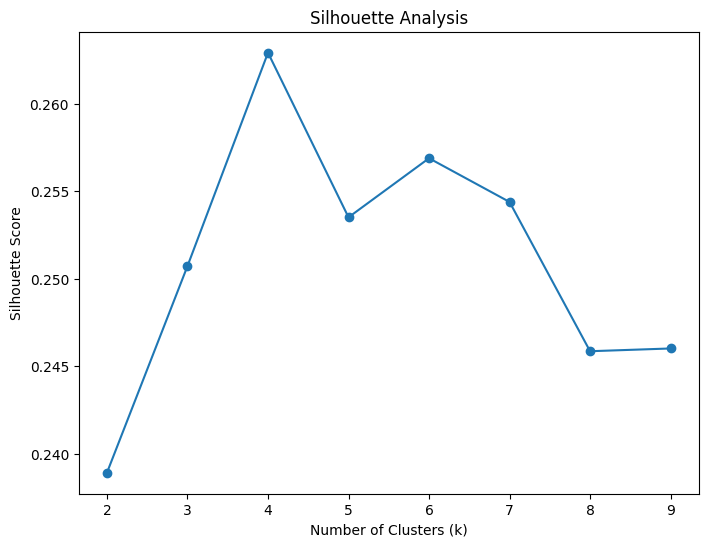

Top 3 k values with Silhouette Scores:
k=4: Silhouette Score=0.2629
k=6: Silhouette Score=0.2569
k=7: Silhouette Score=0.2544


In [24]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_pred = kmeans.fit_predict(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, labels_pred))

# Plot Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Display the top 3 k values with their silhouette scores
silhouette_scores_with_k = list(zip(range(2, 10), silhouette_scores))
silhouette_scores_with_k.sort(key=lambda x: x[1], reverse=True)  # Sort by score in descending order

print("Top 3 k values with Silhouette Scores:")
for k, score in silhouette_scores_with_k[:3]:
    print(f"k={k}: Silhouette Score={score:.4f}")


Three distinct visualizations for the top three values of K

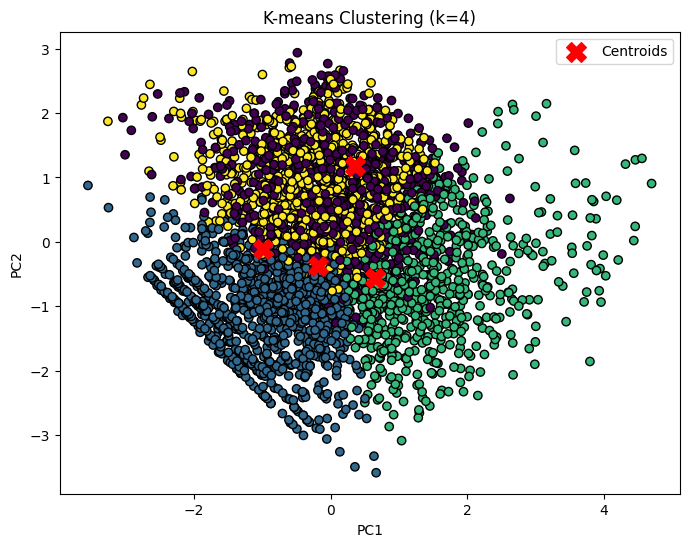

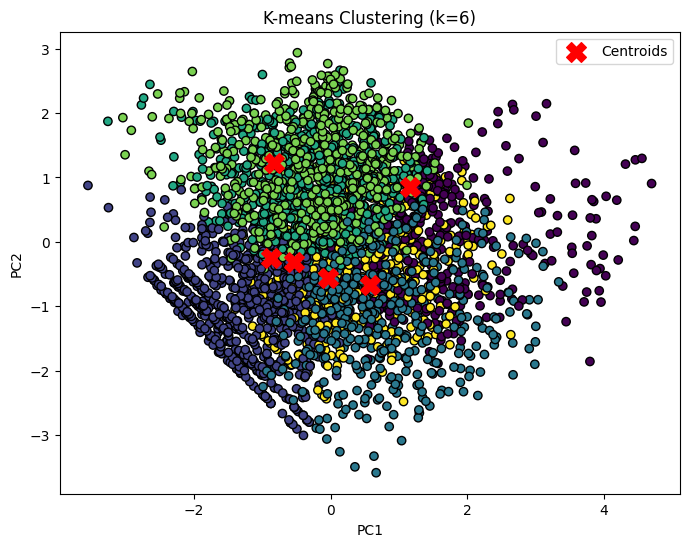

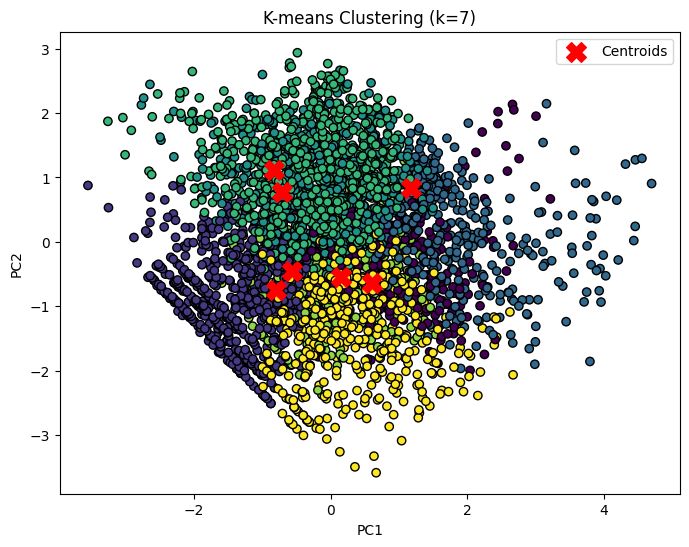

In [25]:
k_values = [4, 6, 7]

# Perform K-means clustering and plot results
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_pred = kmeans.fit_predict(pca_data_scaled)
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_pred, cmap='viridis', edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'K-means Clustering (k={k})')
    plt.legend()
    plt.show()

Hierarchial Clustering

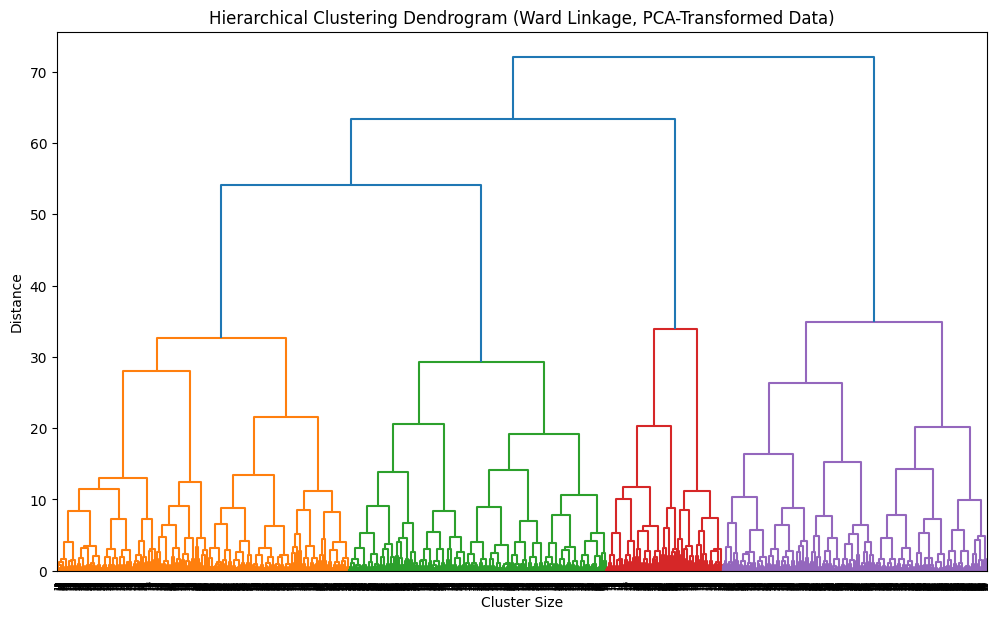

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(pca_data, 'ward')

# Plotting the Dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linked, orientation='top', labels=target_data.tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage, PCA-Transformed Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


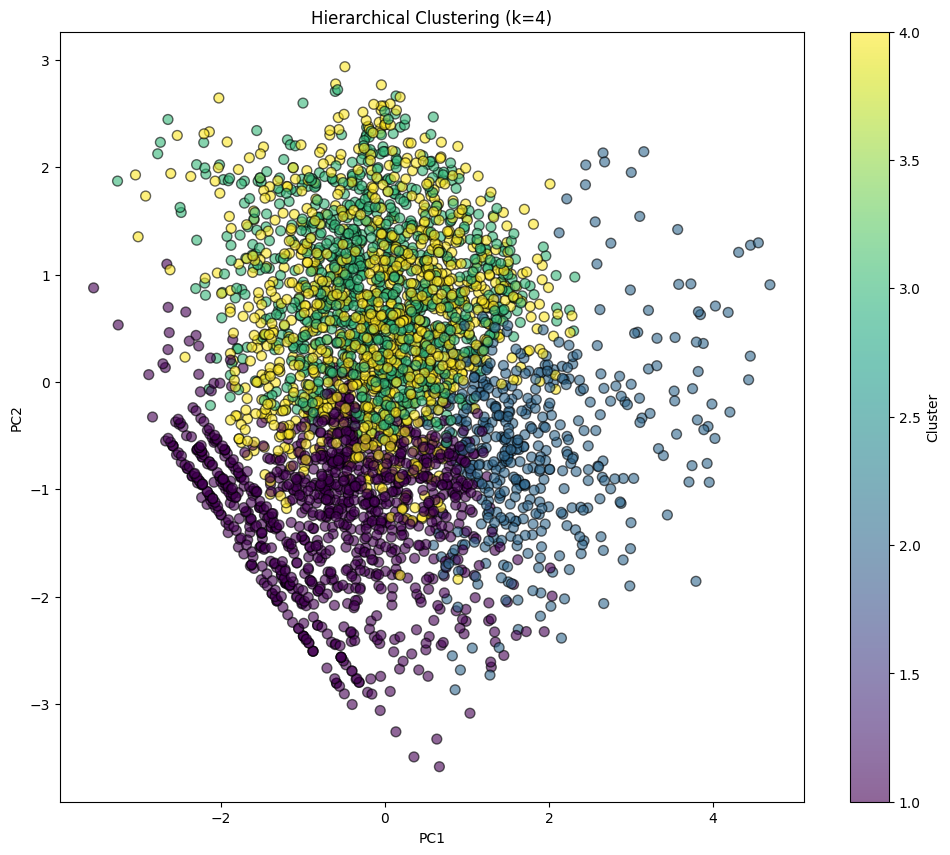

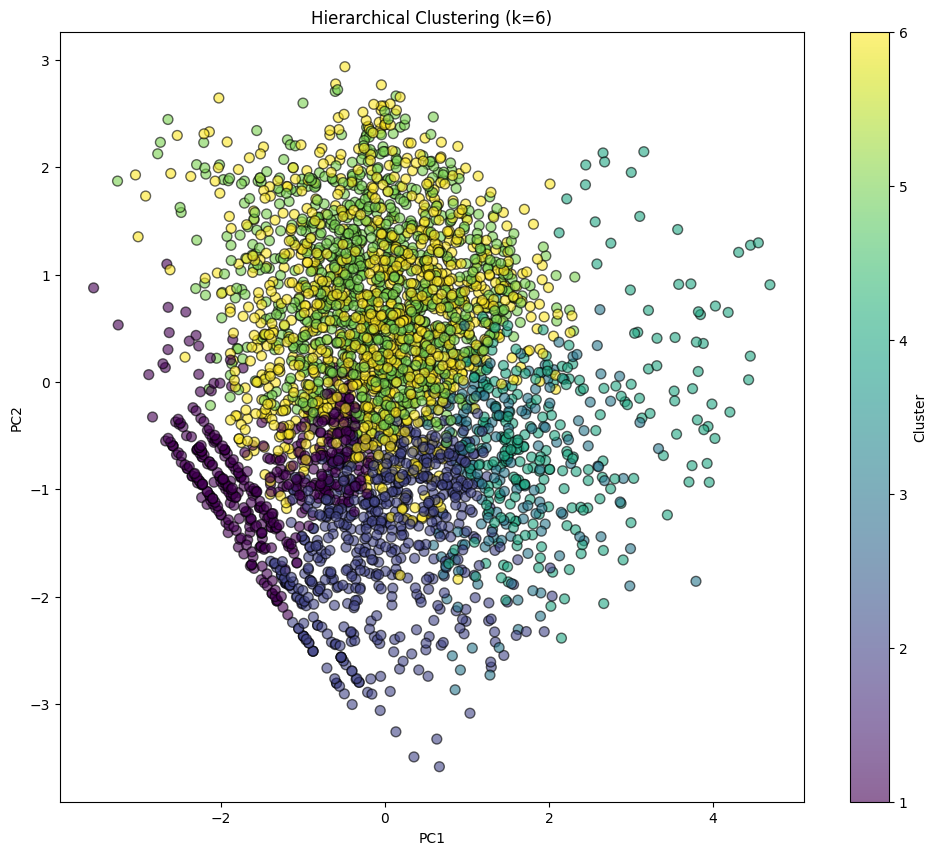

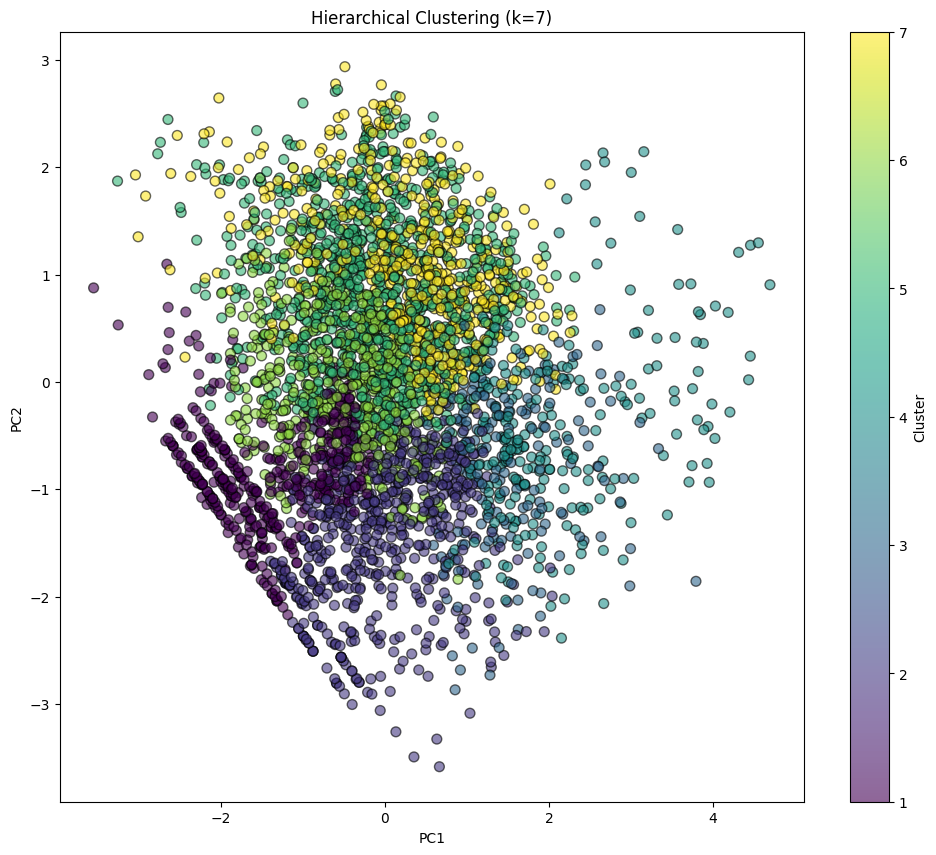

In [27]:
Z = linkage(pca_data, 'ward')  # You can change the method if needed

# Your best k values
best_k_values = [4, 6, 7]

for k in best_k_values:
    # Use the linkage matrix Z here
    hierarchical_clusters = fcluster(Z, t=k, criterion='maxclust')

    # Assuming X is your data for plotting (pca_data or pca_data_scaled)
    plt.figure(figsize=(12, 10))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hierarchical_clusters, cmap='viridis',
                alpha=0.6, edgecolor='k', s=50)
    plt.title(f'Hierarchical Clustering (k={k})')
    plt.xlabel('PC1')  # Assuming you want to plot PC1 and PC2
    plt.ylabel('PC2')
    plt.colorbar(label='Cluster')
    #plt.savefig(f'hierarchical_k{k}.png')  # Remove or comment out this line if you don't need to save the figures
    #plt.close() # Remove this line to display the plots in the notebook
    plt.show() # Explicitly call plt.show() to display the plots

DBSCAN

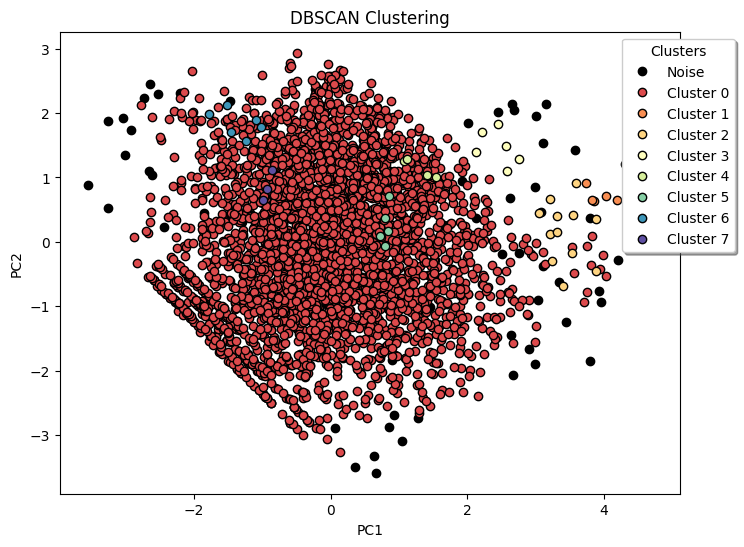

Estimated number of clusters: 8
Estimated number of noise points: 74


In [28]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

# Plotting the DBSCAN results
plt.figure(figsize=(8, 6))

# Handle noise points (-1 label)
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Prepare for the legend
legend_labels = []

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise.
        col = 'k'
        label = 'Noise'
    else:
        label = f'Cluster {k}'

    class_member_mask = (dbscan_labels == k)
    xy = pca_data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

    # Add label for legend
    legend_labels.append(label)

# Add a legend box on the top-right corner
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1), title="Clusters", shadow=True)

# Set plot title and labels
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

# Print the number of clusters and noise points
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
